In [3]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score,mean_squared_error

In [4]:
dataset=pd.read_csv("dataset.csv")
dataset.head(5)

,id,Date,number of bedrooms,number of bathrooms,living area,lot area,number of floors,waterfront present,number of views,condition of the house,...,Built Year,Renovation Year,Postal Code,Lattitude,Longitude,living_area_renov,lot_area_renov,Number of schools nearby,Distance from the airport,Price
0,6762810145,42491,5,2.50,3650,9050,2.0,0,4,5,...,1921,0,122003,52.8645,-114.557,2880,5400,2,58,2380000
1,6762810635,42491,4,2.50,2920,4000,1.5,0,0,5,...,1909,0,122004,52.8878,-114.470,2470,4000,2,51,1400000
2,6762810998,42491,5,2.75,2910,9480,1.5,0,0,3,...,1939,0,122004,52.8852,-114.468,2940,6600,1,53,1200000
3,6762812605,42491,4,2.50,3310,42998,2.0,0,0,3,...,2001,0,122005,52.9532,-114.321,3350,42847,3,76,838000
4,6762812919,42491,3,2.00,2710,4500,1.5,0,0,4,...,1929,0,122006,52.9047,-114.485,2060,4500,1,51,805000


In [5]:
dataset.shape

(14620, 23)

In [6]:
dataset = dataset[dataset["Built Year"] >= 1970]


In [7]:
dataset.shape

(7829, 23)

In [8]:
dataset

,id,Date,number of bedrooms,number of bathrooms,living area,lot area,number of floors,waterfront present,number of views,condition of the house,...,Built Year,Renovation Year,Postal Code,Lattitude,Longitude,living_area_renov,lot_area_renov,Number of schools nearby,Distance from the airport,Price
3,6762812605,42491,4,2.50,3310,42998,2.0,0,0,3,...,2001,0,122005,52.9532,-114.321,3350,42847,3,76,838000
6,6762813157,42491,5,3.25,3660,11995,2.0,0,2,3,...,2006,0,122008,52.7637,-114.050,3320,11241,3,72,785000
10,6762814787,42491,5,2.50,2820,67518,2.0,0,0,3,...,1979,0,122011,52.8094,-114.215,2820,48351,2,51,675000
13,6762815654,42491,4,2.75,2710,37277,2.0,0,0,3,...,2000,0,122012,52.6934,-114.177,2390,39299,1,74,630000
14,6762815737,42491,3,2.25,1750,1572,2.5,0,0,3,...,2005,0,122013,52.8798,-114.511,2410,3050,3,51,626000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14608,6762826539,42734,4,2.75,1580,3770,1.0,0,0,3,...,2002,0,122055,52.9668,-114.158,1740,3800,1,51,315000
14609,6762826741,42734,3,2.00,1310,1361,3.0,0,0,3,...,2003,0,122038,52.9637,-114.533,1370,1608,1,61,310000
14610,6762828349,42734,4,2.75,1810,7350,1.0,0,0,4,...,1980,0,122065,52.6003,-114.361,1750,7350,1,73,272000
14611,6762828783,42734,3,1.75,1350,7686,1.0,0,0,3,...,1987,0,122024,52.5917,-114.242,1370,7686,2,70,261000


In [9]:
dataset.columns

Index(['id', 'Date', 'number of bedrooms', 'number of bathrooms',
       'living area', 'lot area', 'number of floors', 'waterfront present',
       'number of views', 'condition of the house', 'grade of the house',
       'Area of the house(excluding basement)', 'Area of the basement',
       'Built Year', 'Renovation Year', 'Postal Code', 'Lattitude',
       'Longitude', 'living_area_renov', 'lot_area_renov',
       'Number of schools nearby', 'Distance from the airport', 'Price'],
      dtype='object')

In [10]:
dataset.isnull().sum()

id                                       0
Date                                     0
number of bedrooms                       0
number of bathrooms                      0
living area                              0
lot area                                 0
number of floors                         0
waterfront present                       0
number of views                          0
condition of the house                   0
grade of the house                       0
Area of the house(excluding basement)    0
Area of the basement                     0
Built Year                               0
Renovation Year                          0
Postal Code                              0
Lattitude                                0
Longitude                                0
living_area_renov                        0
lot_area_renov                           0
Number of schools nearby                 0
Distance from the airport                0
Price                                    0
dtype: int6

In [11]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7829 entries, 3 to 14614
Data columns (total 23 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   id                                     7829 non-null   int64  
 1   Date                                   7829 non-null   int64  
 2   number of bedrooms                     7829 non-null   int64  
 3   number of bathrooms                    7829 non-null   float64
 4   living area                            7829 non-null   int64  
 5   lot area                               7829 non-null   int64  
 6   number of floors                       7829 non-null   float64
 7   waterfront present                     7829 non-null   int64  
 8   number of views                        7829 non-null   int64  
 9   condition of the house                 7829 non-null   int64  
 10  grade of the house                     7829 non-null   int64  
 11  Area of 

In [12]:
dataset=dataset[["number of bedrooms","number of bathrooms","living_area_renov","lot_area_renov","number of floors","grade of the house","Built Year","Number of schools nearby","Distance from the airport","Price"]]
dataset.head(5)

,number of bedrooms,number of bathrooms,living_area_renov,lot_area_renov,number of floors,grade of the house,Built Year,Number of schools nearby,Distance from the airport,Price
3,4,2.50,3350,42847,2.0,9,2001,3,76,838000
6,5,3.25,3320,11241,2.0,10,2006,3,72,785000
10,5,2.50,2820,48351,2.0,8,1979,2,51,675000
13,4,2.75,2390,39299,2.0,9,2000,1,74,630000
14,3,2.25,2410,3050,2.5,9,2005,3,51,626000


In [13]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7829 entries, 3 to 14614
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   number of bedrooms         7829 non-null   int64  
 1   number of bathrooms        7829 non-null   float64
 2   living_area_renov          7829 non-null   int64  
 3   lot_area_renov             7829 non-null   int64  
 4   number of floors           7829 non-null   float64
 5   grade of the house         7829 non-null   int64  
 6   Built Year                 7829 non-null   int64  
 7   Number of schools nearby   7829 non-null   int64  
 8   Distance from the airport  7829 non-null   int64  
 9   Price                      7829 non-null   int64  
dtypes: float64(2), int64(8)
memory usage: 672.8 KB


In [14]:
def roundfig(item):
    return round(item)

In [15]:
dataset.loc[:,"number of bathrooms"]=dataset.loc[:,"number of bathrooms"].apply(roundfig)
dataset.loc[:,"number of floors"]=dataset["number of floors"].apply(roundfig)

In [16]:
dataset

,number of bedrooms,number of bathrooms,living_area_renov,lot_area_renov,number of floors,grade of the house,Built Year,Number of schools nearby,Distance from the airport,Price
3,4,2.0,3350,42847,2.0,9,2001,3,76,838000
6,5,3.0,3320,11241,2.0,10,2006,3,72,785000
10,5,2.0,2820,48351,2.0,8,1979,2,51,675000
13,4,3.0,2390,39299,2.0,9,2000,1,74,630000
14,3,2.0,2410,3050,2.0,9,2005,3,51,626000
...,...,...,...,...,...,...,...,...,...,...
14608,4,3.0,1740,3800,1.0,7,2002,1,51,315000
14609,3,2.0,1370,1608,3.0,7,2003,1,61,310000
14610,4,3.0,1750,7350,1.0,7,1980,1,73,272000
14611,3,2.0,1370,7686,1.0,7,1987,2,70,261000


In [17]:
dataset.describe()

,number of bedrooms,number of bathrooms,living_area_renov,lot_area_renov,number of floors,grade of the house,Built Year,Number of schools nearby,Distance from the airport,Price
count,7829.000000,7829.000000,7829.000000,7829.000000,7829.000000,7829.000000,7829.000000,7829.000000,7829.000000,7.829000e+03
mean,3.495721,2.326989,2215.965257,14955.222123,1.765360,8.171797,1993.994635,2.008686,64.941500,5.689107e+05
std,0.810249,0.714557,726.940019,31054.221813,0.535405,1.144734,12.658519,0.822167,8.872264,3.793496e+05
min,1.000000,0.000000,690.000000,651.000000,1.000000,5.000000,1970.000000,1.000000,50.000000,9.000000e+04
25%,3.000000,2.000000,1650.000000,5026.000000,1.000000,7.000000,1983.000000,1.000000,57.000000,3.430000e+05
50%,3.000000,2.000000,2100.000000,7700.000000,2.000000,8.000000,1995.000000,2.000000,65.000000,4.750000e+05
75%,4.000000,3.000000,2650.000000,10964.000000,2.000000,9.000000,2005.000000,3.000000,72.000000,6.750000e+05
max,10.000000,8.000000,6110.000000,560617.000000,4.000000,13.000000,2015.000000,3.000000,80.000000,6.890000e+06


In [18]:
dataset.columns

Index(['number of bedrooms', 'number of bathrooms', 'living_area_renov',
       'lot_area_renov', 'number of floors', 'grade of the house',
       'Built Year', 'Number of schools nearby', 'Distance from the airport',
       'Price'],
      dtype='object')

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

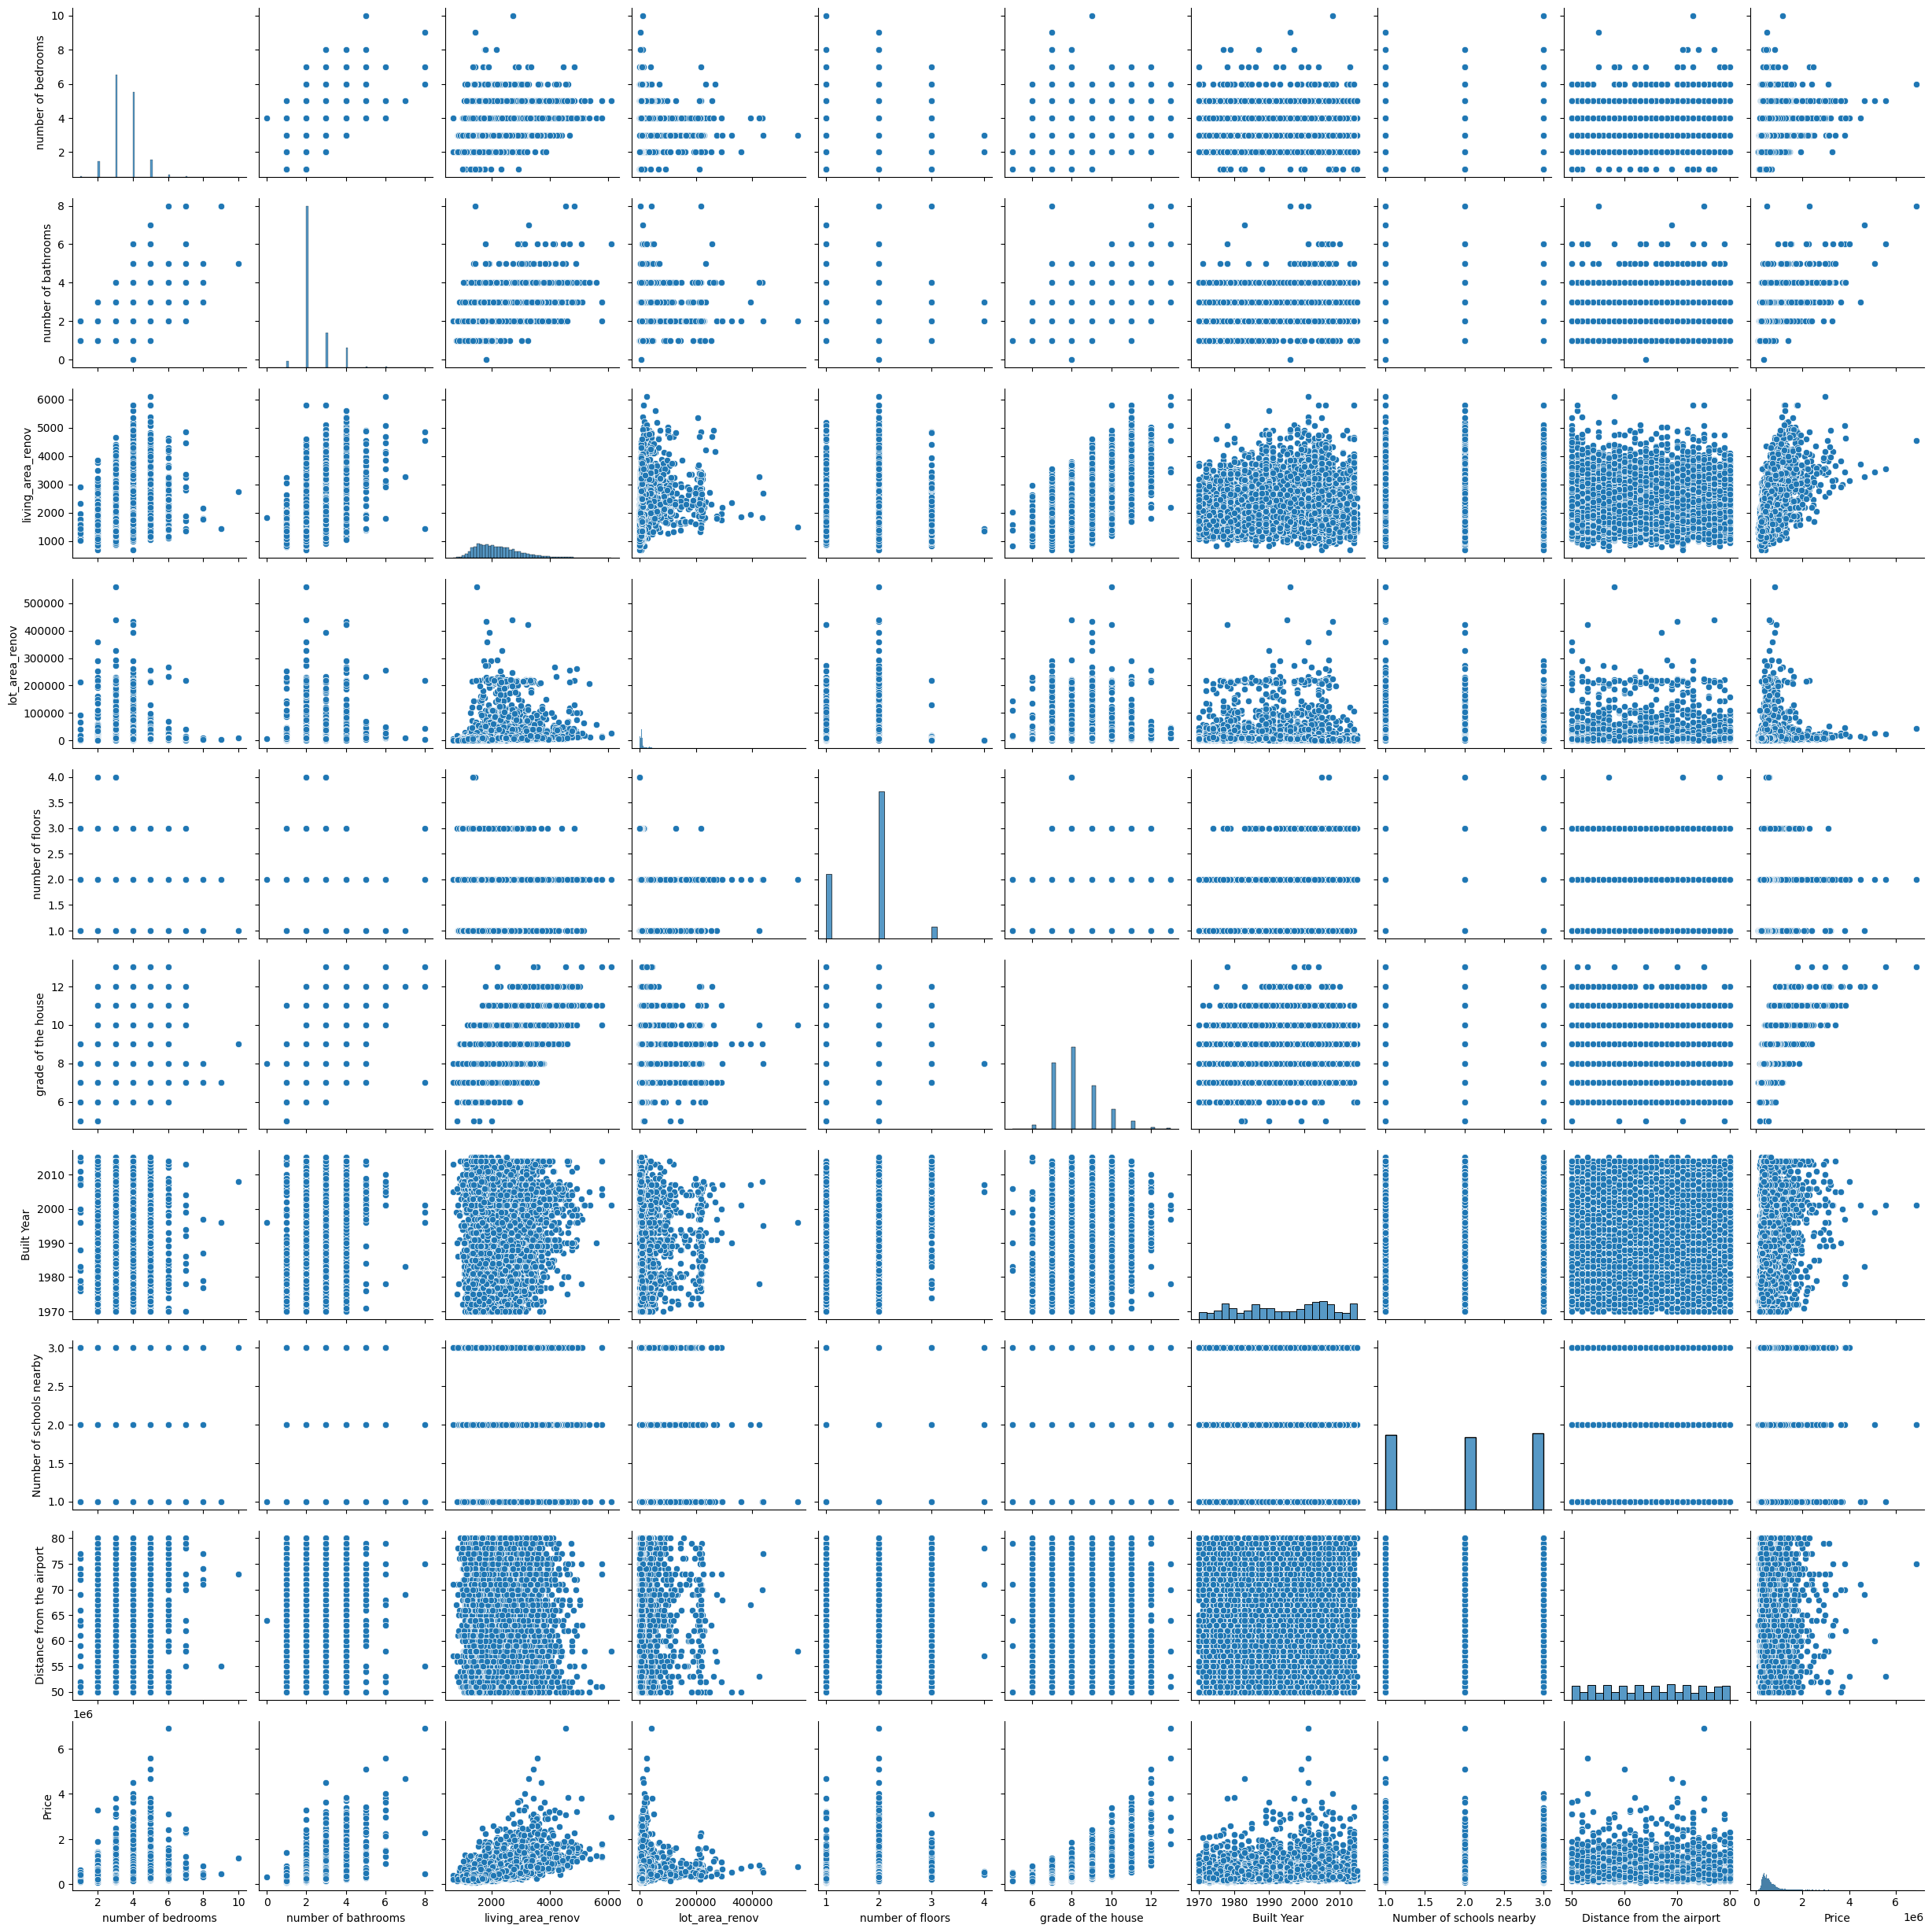

In [20]:
sns.pairplot(data=dataset)
plt.show()

In [21]:
model=LinearRegression()
input=dataset.drop(columns=["Price"])
output=dataset["Price"]

In [22]:
x_train, x_test, y_train, y_test=train_test_split(input,output,test_size=0.2,random_state=42)
model.fit(x_train,y_train)
y_pred = model.predict(x_test)
r2=r2_score(y_test,y_pred)
mse=mean_squared_error(y_test,y_pred)

In [23]:
print(r2)
print(mse)

0.6165364374637318
47297704032.17405


In [24]:
import joblib

In [25]:
joblib.dump(model,"zipmodel.pkl")

['zipmodel.pkl']